In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_ROS = pd.read_csv('./ROSquestdata.csv')
df_ROS[:2]

,Unnamed: 0,신장,체중,고혈압여부,당뇨여부,성별,연령,척추전방위증,디스크위치,PI,PT,Vaccum disc,입원기간,BMI
0,0,1.63,60.3,0,0,2,66,0,4,51.6,36.6,0,2,22.695623
1,1,1.71,71.7,0,0,1,47,0,4,40.8,7.2,0,1,24.520365


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1890 non-null   int64  
 1   신장           1890 non-null   float64
 2   체중           1890 non-null   float64
 3   고혈압여부        1890 non-null   int64  
 4   당뇨여부         1890 non-null   int64  
 5   성별           1890 non-null   int64  
 6   연령           1890 non-null   int64  
 7   척추전방위증       1890 non-null   int64  
 8   디스크위치        1890 non-null   int64  
 9   PI           1890 non-null   float64
 10  PT           1890 non-null   float64
 11  Vaccum disc  1890 non-null   int64  
 12  입원기간         1890 non-null   int64  
 13  BMI          1890 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 206.8 KB


### 연속형 : 단일변수의 정규성 여부판단
- 검중 갯수에 따른 방법 선택
    - 5천개 이하 : shapiro normality test
    - 5천개 이상 : Anderson normality test

#### 선정 변수 : BMI
- 분석내용 : BMI는 정규 분포를 따르는가???
    - 귀무가설 : BMI는 정규 분포이다.
    - 대립가설 : BMI는 정규 분포가 아니다.
- 분석 결론(기준:p-value 0.05)
    - 통계 결론 : 81.5 >0.78(기준:p-value 0.05) 대립가설 참
    - 사실 결론 : BMI는 정규 분포가 아니다.

In [4]:
df_bmi = df_ROS['BMI']
df_bmi

0       22.695623
1       24.520365
2       24.334049
3       24.507861
4       24.097465
          ...    
1885    25.964542
1886    23.936062
1887    25.099502
1888    24.577867
1889    17.361111
Name: BMI, Length: 1890, dtype: float64

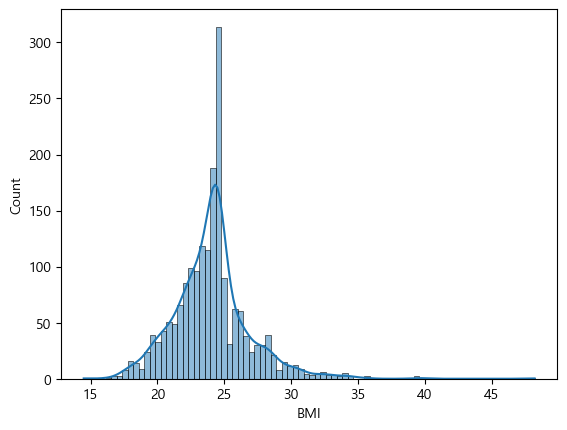

In [5]:
sns.histplot(data=df_ROS,x='BMI',kde=True)
plt.show()

In [6]:
df_bmi =df_ROS['BMI'].dropna()

In [7]:
## s < cv : 정규분포, s > cv : 비정규분포
s, cv, sl = stats.anderson(df_bmi)
s, cv, sl

(25.283237603838643,
 array([0.575, 0.655, 0.785, 0.916, 1.09 ]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수 : 고혈압여부
- 분석내용 : 고혈압여부는 정규 분포를 따르는가???
    - 귀무가설 : 고혈압여부는 정규 분포이다.
    - 대립가설 : 고혈압여부는 정규 분포가 아니다.
- 분석 결론(기준:p-value 0.05)
    - 통계 결론 : 81.5 >0.78(기준:p-value 0.05) 대립가설 참
    - 사실 결론 : 고혈압여부는 정규 분포가 아니다.

In [8]:
df_blood = df_ROS['고혈압여부']
df_blood

0       0
1       0
2       0
3       1
4       1
       ..
1885    0
1886    0
1887    0
1888    0
1889    0
Name: 고혈압여부, Length: 1890, dtype: int64

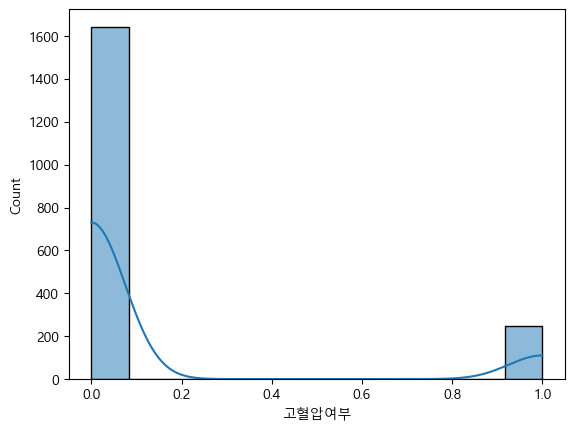

In [9]:
sns.histplot(data=df_ROS,x='고혈압여부',kde=True)
plt.show()

In [10]:
## s < cv : 정규분포, s > cv : 비정규분포
s, cv, sl = stats.anderson(df_blood)
s, cv, sl

(583.679269884833,
 array([0.575, 0.655, 0.785, 0.916, 1.09 ]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수 : 당뇨여부
- 분석내용 : 당뇨여부는 정규 분포를 따르는가???
    - 귀무가설 : 당뇨여부는 정규 분포이다.
    - 대립가설 : 당뇨여부는 정규 분포가 아니다.
- 분석 결론(기준:p-value 0.05)
    - 통계 결론 : 81.5 >0.78(기준:p-value 0.05) 대립가설 참
    - 사실 결론 : 당뇨여부는 정규 분포가 아니다.

In [11]:
df_sugar = df_ROS['당뇨여부']
df_sugar

0       0
1       0
2       0
3       0
4       0
       ..
1885    0
1886    0
1887    0
1888    0
1889    0
Name: 당뇨여부, Length: 1890, dtype: int64

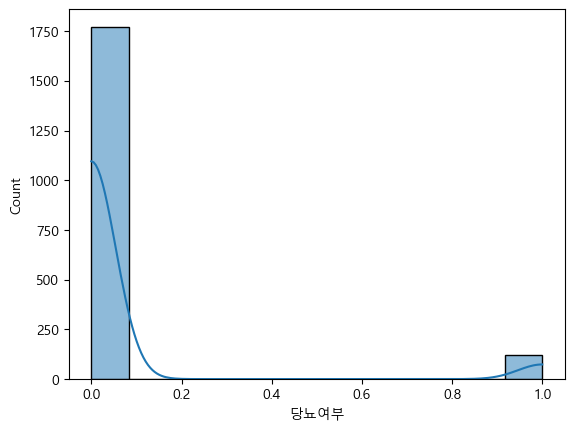

In [12]:
sns.histplot(data=df_ROS,x='당뇨여부',kde=True)
plt.show()

In [13]:
## s < cv : 정규분포, s > cv : 비정규분포
s, cv, sl = stats.anderson(df_sugar)
s, cv, sl

(667.6897453162296,
 array([0.575, 0.655, 0.785, 0.916, 1.09 ]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수 : 척추전방위증
- 분석내용 : 척추전방위증은 정규 분포를 따르는가???
    - 귀무가설 : 척추전방위증은 정규 분포이다.
    - 대립가설 : 척추전방위증은 정규 분포가 아니다.
- 분석 결론(기준:p-value 0.05)
    - 통계 결론 : 81.5 >0.78(기준:p-value 0.05) 대립가설 참
    - 사실 결론 : 척추전방위증은 정규 분포가 아니다.

In [14]:
df_spondylolisthesis = df_ROS['척추전방위증']
df_spondylolisthesis

0       0
1       0
2       0
3       0
4       0
       ..
1885    0
1886    0
1887    0
1888    0
1889    0
Name: 척추전방위증, Length: 1890, dtype: int64

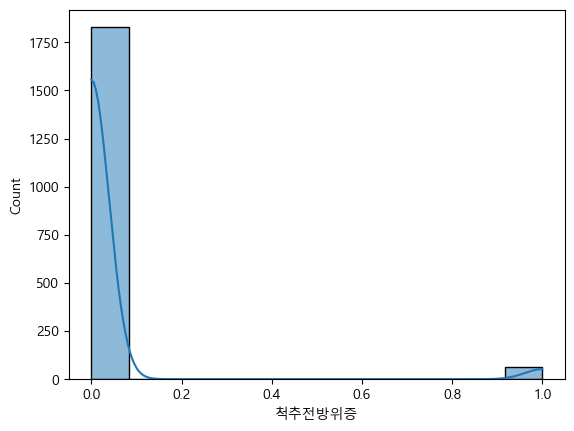

In [15]:
sns.histplot(data=df_ROS,x='척추전방위증',kde=True)
plt.show()

In [16]:
## s < cv : 정규분포, s > cv : 비정규분포
s, cv, sl = stats.anderson(df_spondylolisthesis)
s, cv, sl

(701.8186448532106,
 array([0.575, 0.655, 0.785, 0.916, 1.09 ]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수 : PI
- 분석내용 : PI는 정규 분포를 따르는가???
    - 귀무가설 : PI는 정규 분포이다.
    - 대립가설 : PI는 정규 분포가 아니다.
- 분석 결론(기준:p-value 0.05)
    - 통계 결론 : 81.5 >0.78(기준:p-value 0.05) 대립가설 참
    - 사실 결론 : PI는 정규 분포가 아니다.

In [17]:
df_pi = df_ROS['PI']
df_pi

0       51.6
1       40.8
2       67.5
3       49.2
4       58.8
        ... 
1885    59.5
1886    47.7
1887    44.6
1888    32.2
1889    38.9
Name: PI, Length: 1890, dtype: float64

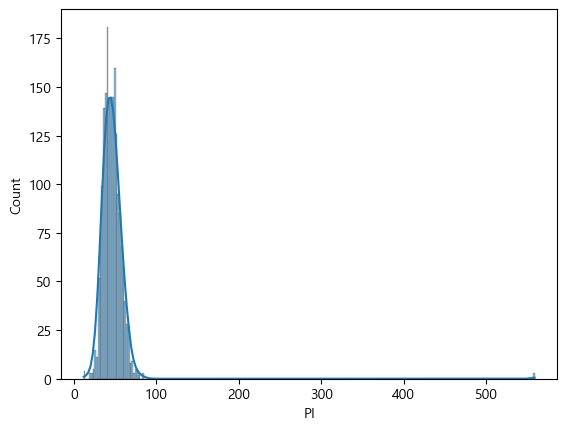

In [18]:
sns.histplot(data=df_ROS,x='PI',kde=True)
plt.show()

In [19]:
## s < cv : 정규분포, s > cv : 비정규분포
s, cv, sl = stats.anderson(df_pi)
s, cv, sl

(202.2253349248058,
 array([0.575, 0.655, 0.785, 0.916, 1.09 ]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수 : PT
- 분석내용 : PT는 정규 분포를 따르는가???
    - 귀무가설 : PT는 정규 분포이다.
    - 대립가설 : PT는 정규 분포가 아니다.
- 분석 결론(기준:p-value 0.05)
    - 통계 결론 : 81.5 >0.78(기준:p-value 0.05) 대립가설 참
    - 사실 결론 : PT는 정규 분포가 아니다.

In [20]:
df_pt = df_ROS['PT']
df_pt

0       36.6
1        7.2
2       27.3
3       18.7
4       14.7
        ... 
1885    23.0
1886    20.2
1887    15.0
1888    11.1
1889     6.8
Name: PT, Length: 1890, dtype: float64

C:\Users\5-22\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


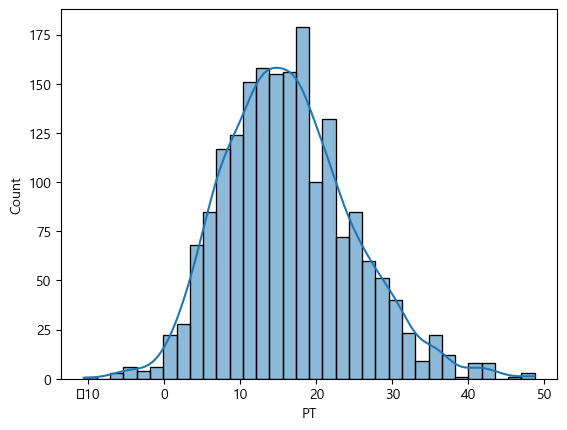

In [21]:
sns.histplot(data=df_ROS,x='PT',kde=True)
plt.show()

In [22]:
## s < cv : 정규분포, s > cv : 비정규분포
s, cv, sl = stats.anderson(df_pt)
s, cv, sl

(5.39598662390199,
 array([0.575, 0.655, 0.785, 0.916, 1.09 ]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

### x 연속형, y 연속형 : 주로 상관관계 확인.
- correlation coefficient(상관관계) : -1 ~ 1 사이 (0에 가까우면 관계없음, -1에 가까우면 반비례, 1에 가까우면 비례)
#### 선정 변수 : 입원기간, BMI
- 분석 내용 : BMI에 따른 입원기간의 차이가 있는가
    - 귀무가설 : 입원기간의 차이 없다.
    - 대립가설 : 입원기간의 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참 (pvalue=0.0)
    - 사실 결론 : 입원기간의 차이가 없다.

In [23]:
df_period_bmi = df_ROS[['입원기간','BMI']].copy()

In [24]:
df_period_bmi.corr()

,입원기간,BMI
입원기간,1.000000,-0.032526
BMI,-0.032526,1.000000


In [25]:
df_period_bmi.isnull().sum()

입원기간    0
BMI     0
dtype: int64

In [26]:
df_period_bmi = df_period_bmi.dropna().copy()

In [27]:
df_period_bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   입원기간    1890 non-null   int64  
 1   BMI     1890 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.7 KB


In [28]:
stats.pearsonr(df_period_bmi['입원기간'],df_period_bmi['BMI'])

PearsonRResult(statistic=-0.03252635812647848, pvalue=0.15751063851862063)

#### 선정 변수 : 입원기간, 고혈압여부
- 분석 내용 : 고혈압여부에 따른 입원기간의 차이가 있는가
    - 귀무가설 : 입원기간의 차이 없다.
    - 대립가설 : 입원기간의 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참 (pvalue=0.0)
    - 사실 결론 : 입원기간의 차이가 있다.

In [29]:
df_period_blood = df_ROS[['입원기간','고혈압여부']].copy()

In [30]:
df_period_blood.corr()

,입원기간,고혈압여부
입원기간,1.000000,0.040807
고혈압여부,0.040807,1.000000


In [31]:
df_period_blood.isnull().sum()

입원기간     0
고혈압여부    0
dtype: int64

In [32]:
df_period_blood = df_period_blood.dropna().copy()

In [33]:
df_period_blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   입원기간    1890 non-null   int64
 1   고혈압여부   1890 non-null   int64
dtypes: int64(2)
memory usage: 29.7 KB


In [34]:
stats.pearsonr(df_period_blood['입원기간'],df_period_blood['고혈압여부'])

PearsonRResult(statistic=0.04080655350935071, pvalue=0.07613024933800935)

#### 선정 변수 : 입원기간, 당뇨여부
- 분석 내용 : 당뇨여부에 따른 입원기간의 차이가 있는가
    - 귀무가설 : 입원기간의 차이 없다.
    - 대립가설 : 입원기간의 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참 (pvalue=0.0)
    - 사실 결론 : 입원기간의 차이가 있다.

In [35]:
df_period_sugar = df_ROS[['입원기간','당뇨여부']].copy()

In [36]:
df_period_sugar.corr()

,입원기간,당뇨여부
입원기간,1.000000,0.021571
당뇨여부,0.021571,1.000000


In [37]:
df_period_sugar.isnull().sum()

입원기간    0
당뇨여부    0
dtype: int64

In [38]:
df_period_sugar = df_period_sugar.dropna().copy()

In [39]:
df_period_sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   입원기간    1890 non-null   int64
 1   당뇨여부    1890 non-null   int64
dtypes: int64(2)
memory usage: 29.7 KB


In [40]:
stats.pearsonr(df_period_sugar['입원기간'],df_period_sugar['당뇨여부'])

PearsonRResult(statistic=0.021571346138355898, pvalue=0.34861241786231345)

#### 선정 변수 : 입원기간, 척추전방위증
- 분석 내용 : 척추전방위증에 따른 입원기간의 차이가 있는가
    - 귀무가설 : 입원기간의 차이 없다.
    - 대립가설 : 입원기간의 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참 (pvalue=0.0)
    - 사실 결론 : 입원기간의 차이가 있다.

In [41]:
df_period_spondylolisthesis = df_ROS[['입원기간','척추전방위증']].copy()

In [42]:
df_period_spondylolisthesis.corr()

,입원기간,척추전방위증
입원기간,1.000000,0.021708
척추전방위증,0.021708,1.000000


In [43]:
df_period_spondylolisthesis.isnull().sum()

입원기간      0
척추전방위증    0
dtype: int64

In [44]:
df_period_spondylolisthesis = df_period_spondylolisthesis.dropna().copy()

In [45]:
df_period_spondylolisthesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   입원기간    1890 non-null   int64
 1   척추전방위증  1890 non-null   int64
dtypes: int64(2)
memory usage: 29.7 KB


In [46]:
stats.pearsonr(df_period_spondylolisthesis['입원기간'],df_period_spondylolisthesis['척추전방위증'])

PearsonRResult(statistic=0.021707563963577578, pvalue=0.34557643733933774)

#### 선정 변수 : 입원기간, PI
- 분석 내용 : PI에 따른 입원기간의 차이가 있는가
    - 귀무가설 : 입원기간의 차이 없다.
    - 대립가설 : 입원기간의 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참 (pvalue=0.0)
    - 사실 결론 : 입원기간의 차이가 있다.

In [47]:
df_period_pi = df_ROS[['입원기간','PI']].copy()

In [48]:
df_period_pi.corr()

,입원기간,PI
입원기간,1.000000,-0.009462
PI,-0.009462,1.000000


In [49]:
df_period_pi.isnull().sum()

입원기간    0
PI      0
dtype: int64

In [50]:
df_period_pi = df_period_pi.dropna().copy()

In [51]:
df_period_pi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   입원기간    1890 non-null   int64  
 1   PI      1890 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.7 KB


In [52]:
stats.pearsonr(df_period_pi['입원기간'],df_period_pi['PI'])

PearsonRResult(statistic=-0.009462281324902861, pvalue=0.6809981071755282)

#### 선정 변수 : 입원기간, PT
- 분석 내용 : PT에 따른 입원기간의 차이가 있는가
    - 귀무가설 : 입원기간의 차이 없다.
    - 대립가설 : 입원기간의 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참 (pvalue=0.0)
    - 사실 결론 : 입원기간의 차이가 있다.

In [53]:
df_period_pt = df_ROS[['입원기간','PT']].copy()

In [54]:
df_period_pt.corr()

,입원기간,PT
입원기간,1.000000,0.011451
PT,0.011451,1.000000


In [55]:
df_period_pt.isnull().sum()

입원기간    0
PT      0
dtype: int64

In [56]:
df_period_pt = df_period_pt.dropna().copy()

In [57]:
df_period_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   입원기간    1890 non-null   int64  
 1   PT      1890 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.7 KB


In [58]:
stats.pearsonr(df_period_pt['입원기간'],df_period_pt['PT'])

PearsonRResult(statistic=0.011450550770305892, pvalue=0.6188437581048726)

<Axes: xlabel='입원기간', ylabel='count'>

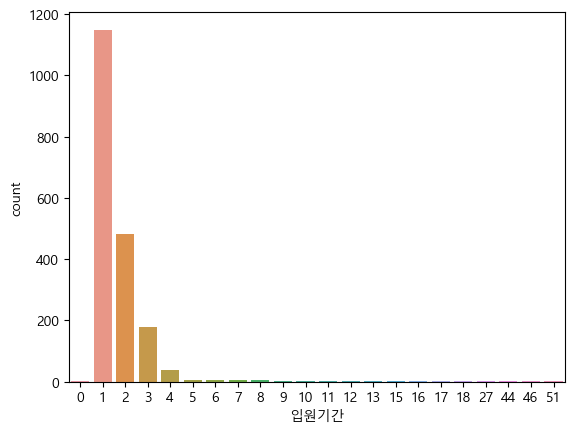

In [59]:
sns.countplot(data=df_ROS, x='입원기간')

In [60]:
df_ROS['입원기간'].value_counts()

1     1149
2      482
3      180
4       39
8        6
5        6
6        4
7        4
0        3
17       3
11       3
27       1
46       1
9        1
18       1
16       1
44       1
13       1
15       1
51       1
12       1
10       1
Name: 입원기간, dtype: int64

In [61]:
condition = (df_ROS['입원기간'] == '고혈압여부') | (df_ROS['입원기간'] == '당뇨여부')  | (df_ROS['입원기간'] == '척추전방위증') 
df_channel_amount = df_ROS[condition][['입원기간','입원기간']]
df_channel_amount.head(10) 

,입원기간,고혈압여부
